**Import cell**
<p>We are importing the four modules we will need : <br>
random for generating uniform $\mathcal{U}([0;1])$ <br>
math for basic functions such as $\log$ or $\sqrt{}$ <br>
numpy for basic functions such as linspace andy for histograms <br>
matplotlib.pyplot for plotting outstanding results
</p>

In [1]:
import random as rd
import math
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 : 

In [2]:
"""Exercise 1"""
"""Question 1"""

print("Values obtained from sampling the uniform distribution U([0;1]) 5 times :{}".format([round(rd.random(),2) for i in range(5)]))

"""Question 2"""
def mean_estimate(distribution) :
    return round(1/1000*sum([distribution() for i in range(1000)]),2)

print( "The mean values estimated by sampling the uniform distribution U([0;1]) is :{}".format(mean_estimate(rd.random)))

Values obtained from sampling the uniform distribution U([0;1]) 5 times :[0.95, 0.01, 0.17, 0.42, 0.96]
The mean values estimated by sampling the uniform distribution U([0;1]) is :0.5


## Exercise 2 :

In [3]:

"""Exercise 2"""
"""Question 2"""
def V():
    return 2*math.pi*rd.random()

print("The mean estimated of V = 2piU is :{}. The theoritical one is :{}".format(round(mean_estimate(V),2),round(math.pi,2)))

The mean estimated of V = 2piU is :3.21. The theoritical one is :3.14


## Exercise 3 :

Values obtained from sampling the exponential distribution E(1/2) 5 times :[0.29, 0.89, 1.29, 0.73, 2.72]


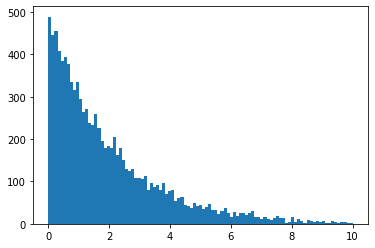

The estimated mean value is : 2.1


In [4]:
"""Exercise 1"""
"""Question 1"""
def E() :
    return -2*math.log(1-rd.random())
print("Values obtained from sampling the exponential distribution E(1/2) 5 times :{}".format([round(E(),2) for i in range(5)]))

plt.close()
plt.figure()
plt.hist([E() for i in range(10000)],np.linspace(0,10,100))
plt.show()
"""Question 2"""
print("The estimated mean value is : {}".format(mean_estimate(E)))
    

## Exercise 4 :

In [5]:
def N1() :
    return math.sqrt(E())*math.cos(V())
def N2() :
    return math.sqrt(E())*math.sin(V())

print("Values obtained from sampling N1 5 times : {}".format([round(N1(),2) for i in range(5)]))
print("Values obtained from sampling N2 5 times : {}".format([round(N2(),2) for i in range(5)]))


Values obtained from sampling N1 5 times : [-0.99, 1.2, -0.41, -0.13, 1.25]
Values obtained from sampling N2 5 times : [-1.71, -1.24, 0.28, -0.36, 1.27]


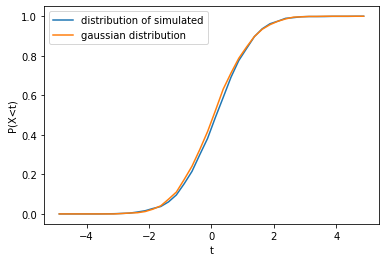

In [6]:
L1 = [N1() for i in range(20000)]
L2 = [N2() for i in range(20000)]
L3 = [rd.normalvariate(0,1) for i in range(20000)]


def count(subdivision, samples) :
    return [sum([samples[i]<=subdivision[0] for i in range(2000)])/2000]+[sum([subdivision[j]<samples[i]<=subdivision[j+1] for i in range(2000)])/2000 for j in range(1, len(subdivision)-1)]+[sum([samples[i]>subdivision[-1] for i in range(2000)])/2000]


sub = [-5+0.25*i for i in range(40)]
X = [sub[i]+0.125 for i in range(40)]

F1 = count(sub, L1)
F3 = count(sub, L3)
plt.close()
plt.plot(X, [sum(F1[:i]) for i in range(len(F1))])
plt.plot(X, [sum(F3[:i]) for i in range(len(F3))])
plt.xlabel('t')
plt.ylabel('P(X<t)')
plt.legend(['distribution of simulated','gaussian distribution'])

plt.show()

## Exercise 5 :

In [7]:
"""Exercise 5"""
"""Question 1"""
mu1 = 1
mu2 = 1.5

sigma1 = 1
sigma2 = 2

rho = 0.5

def XY() :
    a=N1()
    b=N2()
    return [mu1+sigma1*a,mu2+sigma2*rho*a+sigma2*np.sqrt(1-rho**2)*b]
def mean() :
    X = [XY()[0] for i in range(1000)]
    Y = [XY()[1] for i in range(1000)]
    return sum(X)/1000, sum(Y)/1000

"""Question 2"""
print("The estimated mean value for X is :{}".format(mean()[0]))
print("The estimated mean value for Y is :{}".format(mean()[1]))


The estimated mean value for X is :0.9616375828692564
The estimated mean value for Y is :1.4177432011356228


In [8]:
def correlation() :
    x,y = XY()
    return (x-mu2)*(y-mu2)/sigma1/sigma2

rho_hat = sum([correlation() for i in range(1000)])/1000
print("The estimated correlation is :{}".format(rho_hat))


The estimated correlation is :0.43293520930236784


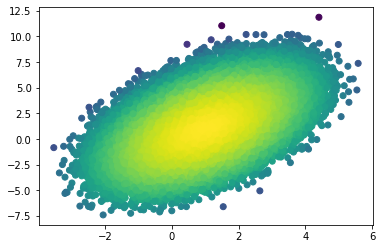

In [11]:
L = [XY() for i in range(500000)]
X,Y = [L[i][0] for i in range(len(L))], [L[i][1] for i in range(len(L))]

z = [-(-Y[i]+4*X[i]-3)*(X[i]-1)-(Y[i]-X[i])*(Y[i]-1)for i in range(len(X))]
c= [-z[i]for i in range(len(z))]

plt.scatter(X,Y,c=z)